In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [3]:
# Number of samples
n = 600

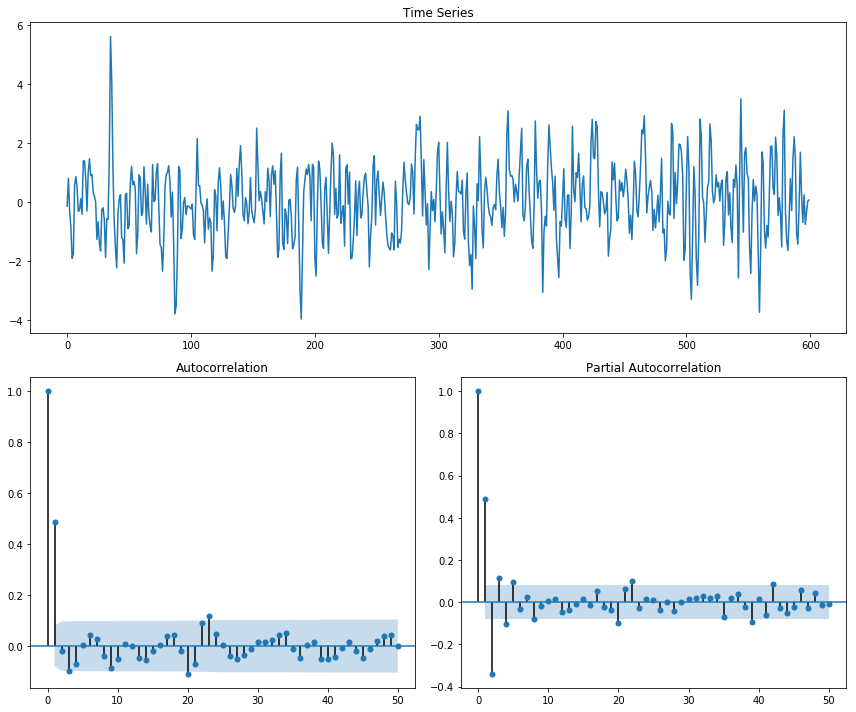

In [4]:
# Generate MA(1) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma1_data)

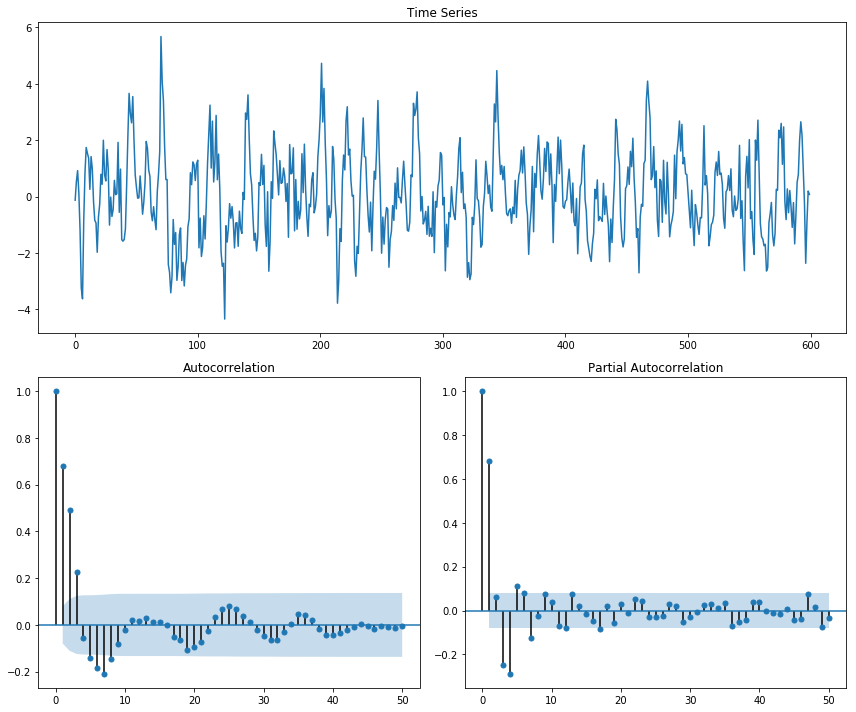

In [5]:
# Generate MA(3) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma3_data)

In [6]:
# Build MA(1) model
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -854.345
Method:                           mle   S.D. of innovations              1.004
Date:                Wed, 14 Aug 2019   AIC                           1712.689
Time:                        11:39:47   BIC                           1721.483
Sample:                             0   HQIC                          1716.113
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6903      0.029     23.958      0.000       0.634       0.747
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4487           +0.0000j            1.4487            0.5000
-----------------------------------------------------------------------------
"""

In [7]:
# Build MA(3) model
ma3 = smtsa.ARMA(ma3_data.tolist(), order=(0, 3)).fit(
    maxlag=30, method='mle', trend='nc')
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -849.029
Method:                           mle   S.D. of innovations              0.995
Date:                Wed, 14 Aug 2019   AIC                           1706.059
Time:                        11:40:08   BIC                           1723.647
Sample:                             0   HQIC                          1712.905
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.5951      0.035     16.948      0.000       0.526       0.664
ma.L2.y        0.6925      0.030     22.825      0.000       0.633       0.752
ma.L3.y        0.4755      0.035     13.515      0.000       0.407       0.544
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0389           -1.1702j            1.1708           -0.2447
MA.2            0.0389           +1.1702j            1.1708            0.2447
MA.3           -1.5341           -0.0000j            1.5341           -0.5000
-----------------------------------------------------------------------------
"""